# Mammogram Data

NOTE: This exploration is for the purpose of familiarizing myself with different modeling techniques. 
This is the final project of the course :Machine Learning, Data Science and Deep Learning with Python by Frank Kane. Find the course on Udemy: https://www.udemy.com/course/data-science-and-machine-learning-with-python-hands-on/

## Data Understanding and Preparation

This set of models uses the Mammographic Masses dataset from the University of California Irvine repository for machine learning. A copy of the data used as well as further explanation of the dataset can be found here:

https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

According to Dua and Graff, "the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes." (Dua, Graff)

While these types of models do not replace human intervention, they can reduce workloads, unecessessary surgery, and aid in selecting medical services providing patients with the best possible outcomes. 

The models presented will be attempting to predict severity (1 being malignant and 0 being benign) of a mass detected by a mammogram. 

This data contains 961 instances of masses detected in mammograms, and contains the following attributes (Dua, Graff):

   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
 BI-RADS is not predicitive and will not be included in any models. 





## Data Preparation and Exploration
Note about missing values: Acquiring the missing values from this dataset is not possible, and they were dropped as they were such a small portion of the sample. It may improve model performance overall to impute this data after discussing with subject matter experts if median or nearest neighbors may be more approriate. Investing in more complete data might also produce better model performance. 

I started this exploration by importing the data from csv, dealing with missing values, and creating a correlation matrix. Finally, I scaled the features using the standard scaler.

In [1]:
import numpy as np
import pandas as pd

col_names = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']

df = pd.read_csv('mammographic_masses.data.txt', names =col_names, na_values='?')
df.head()



,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [2]:
df.describe()
df.isnull().sum()

BI_RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [3]:
corrMatrix = df.corr()
corrMatrix.head()

,BI_RADS,age,shape,margin,density,severity
BI_RADS,1.000000,0.094754,0.186055,0.163086,0.038729,0.231601
age,0.094754,1.000000,0.364077,0.411355,0.028954,0.432066
shape,0.186055,0.364077,1.000000,0.742211,0.078666,0.563308
margin,0.163086,0.411355,0.742211,1.000000,0.109392,0.574919
density,0.038729,0.028954,0.078666,0.109392,1.000000,0.064010


In [4]:
df = df.dropna()

      age  shape  margin  density
0    67.0    3.0     5.0      3.0
2    58.0    4.0     5.0      3.0
3    28.0    1.0     1.0      3.0
8    57.0    1.0     5.0      3.0
10   76.0    1.0     4.0      3.0
..    ...    ...     ...      ...
956  47.0    2.0     1.0      3.0
957  56.0    4.0     5.0      3.0
958  64.0    4.0     5.0      3.0
959  66.0    4.0     5.0      3.0
960  62.0    3.0     3.0      3.0

[830 rows x 4 columns]


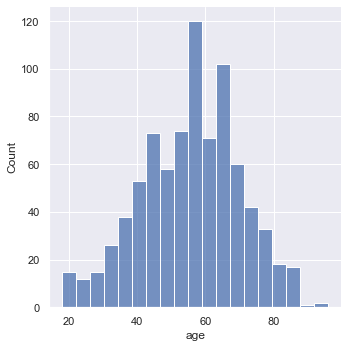

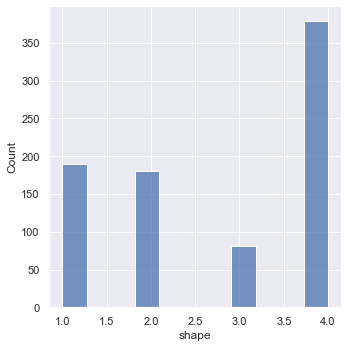

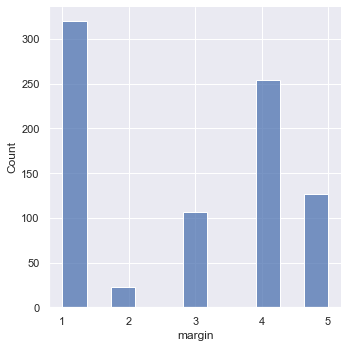

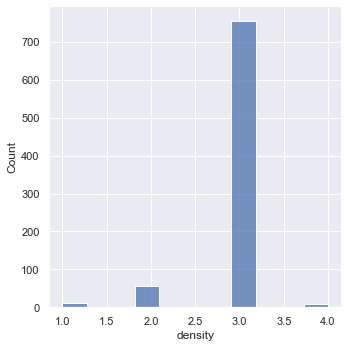

In [5]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()
scale = StandardScaler()
features = list(df.columns[1:5])
y = df["severity"]
X = df[features]
print(X)
X = scale.fit_transform(X)

for feature in features:
   sns.displot(df[feature]) 

## Modeling 

The following models were attempted: different varieties of decision trees, support vector machine, K-nearest neighbors, naive bayse, and logistic regression. Some of these models were first attempted without K-fold cross validation simply for my own comparision of how to implement different solutions. 

## Decision Trees

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.min_samples_leaf = 10
clf = clf.fit(X_train,y_train)

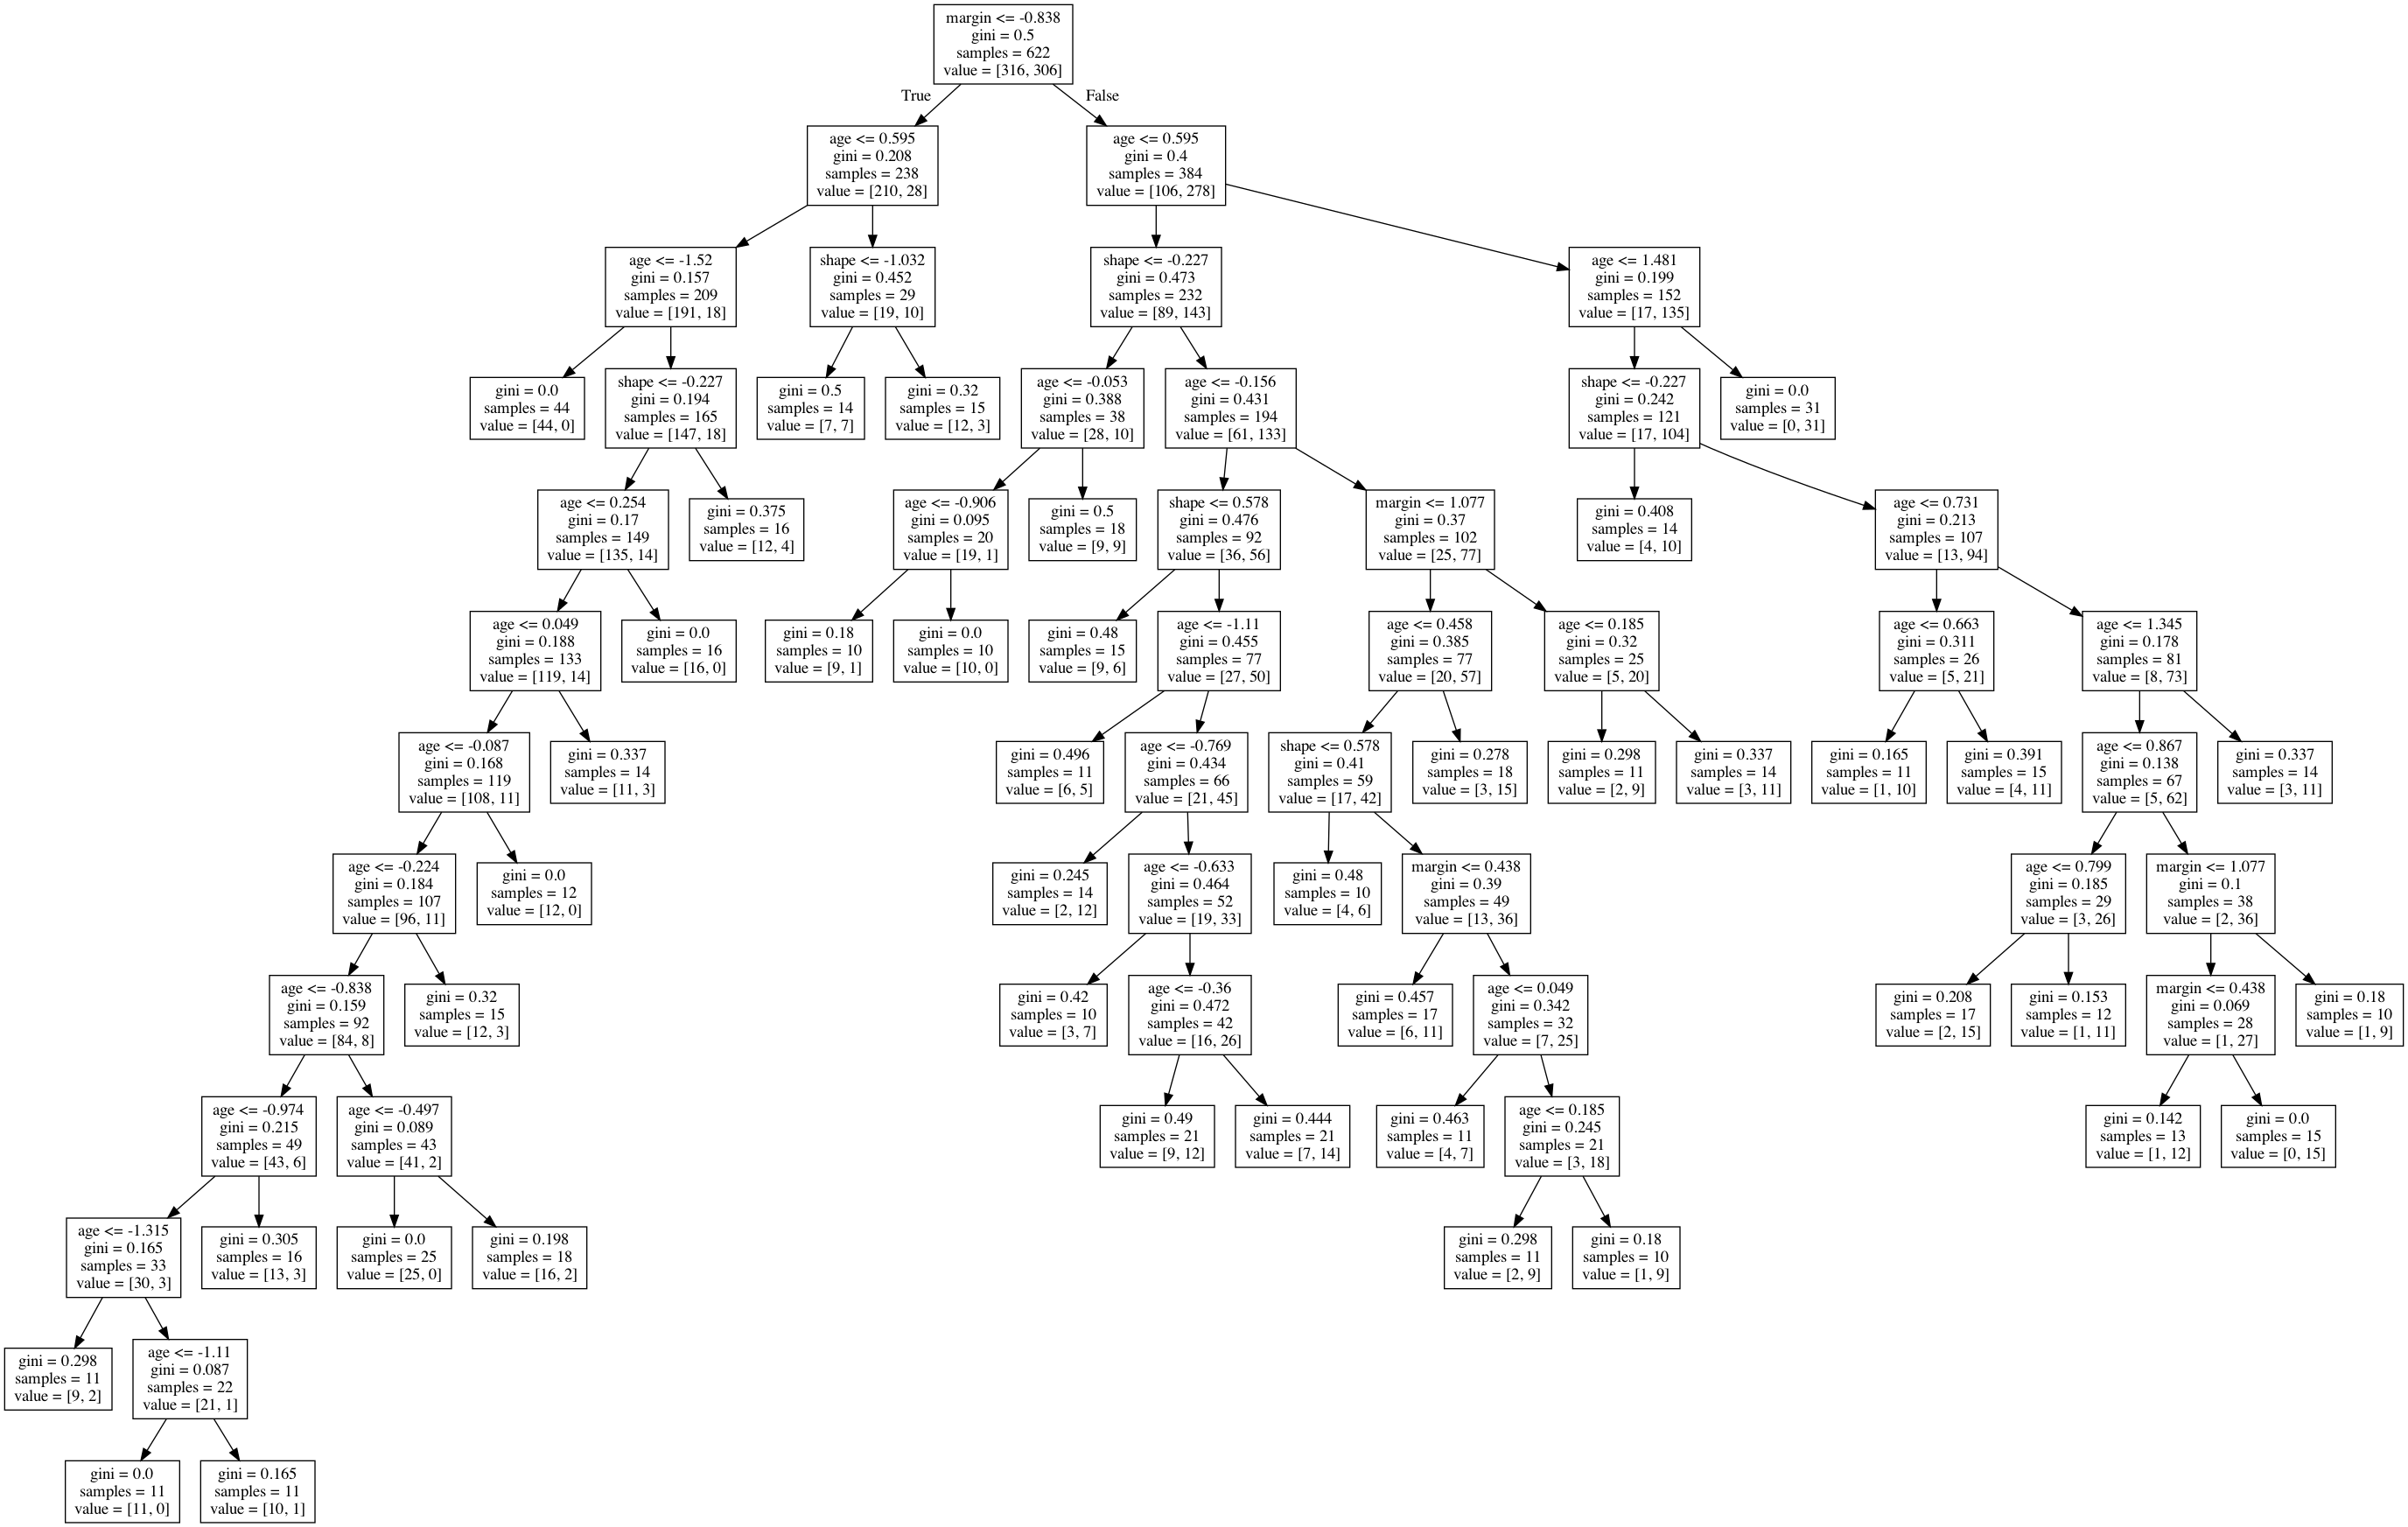

In [8]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, clf.predict(X_test))

print(r2)

r2_train = r2_score(y_train, clf.predict(X_train))

print(r2_train)

0.16931364354044753
0.2795565483577398


[0.74698795 0.79518072 0.79518072 0.73493976 0.8313253  0.73493976
 0.84337349 0.78313253 0.86746988 0.72289157]
0.7855421686746988


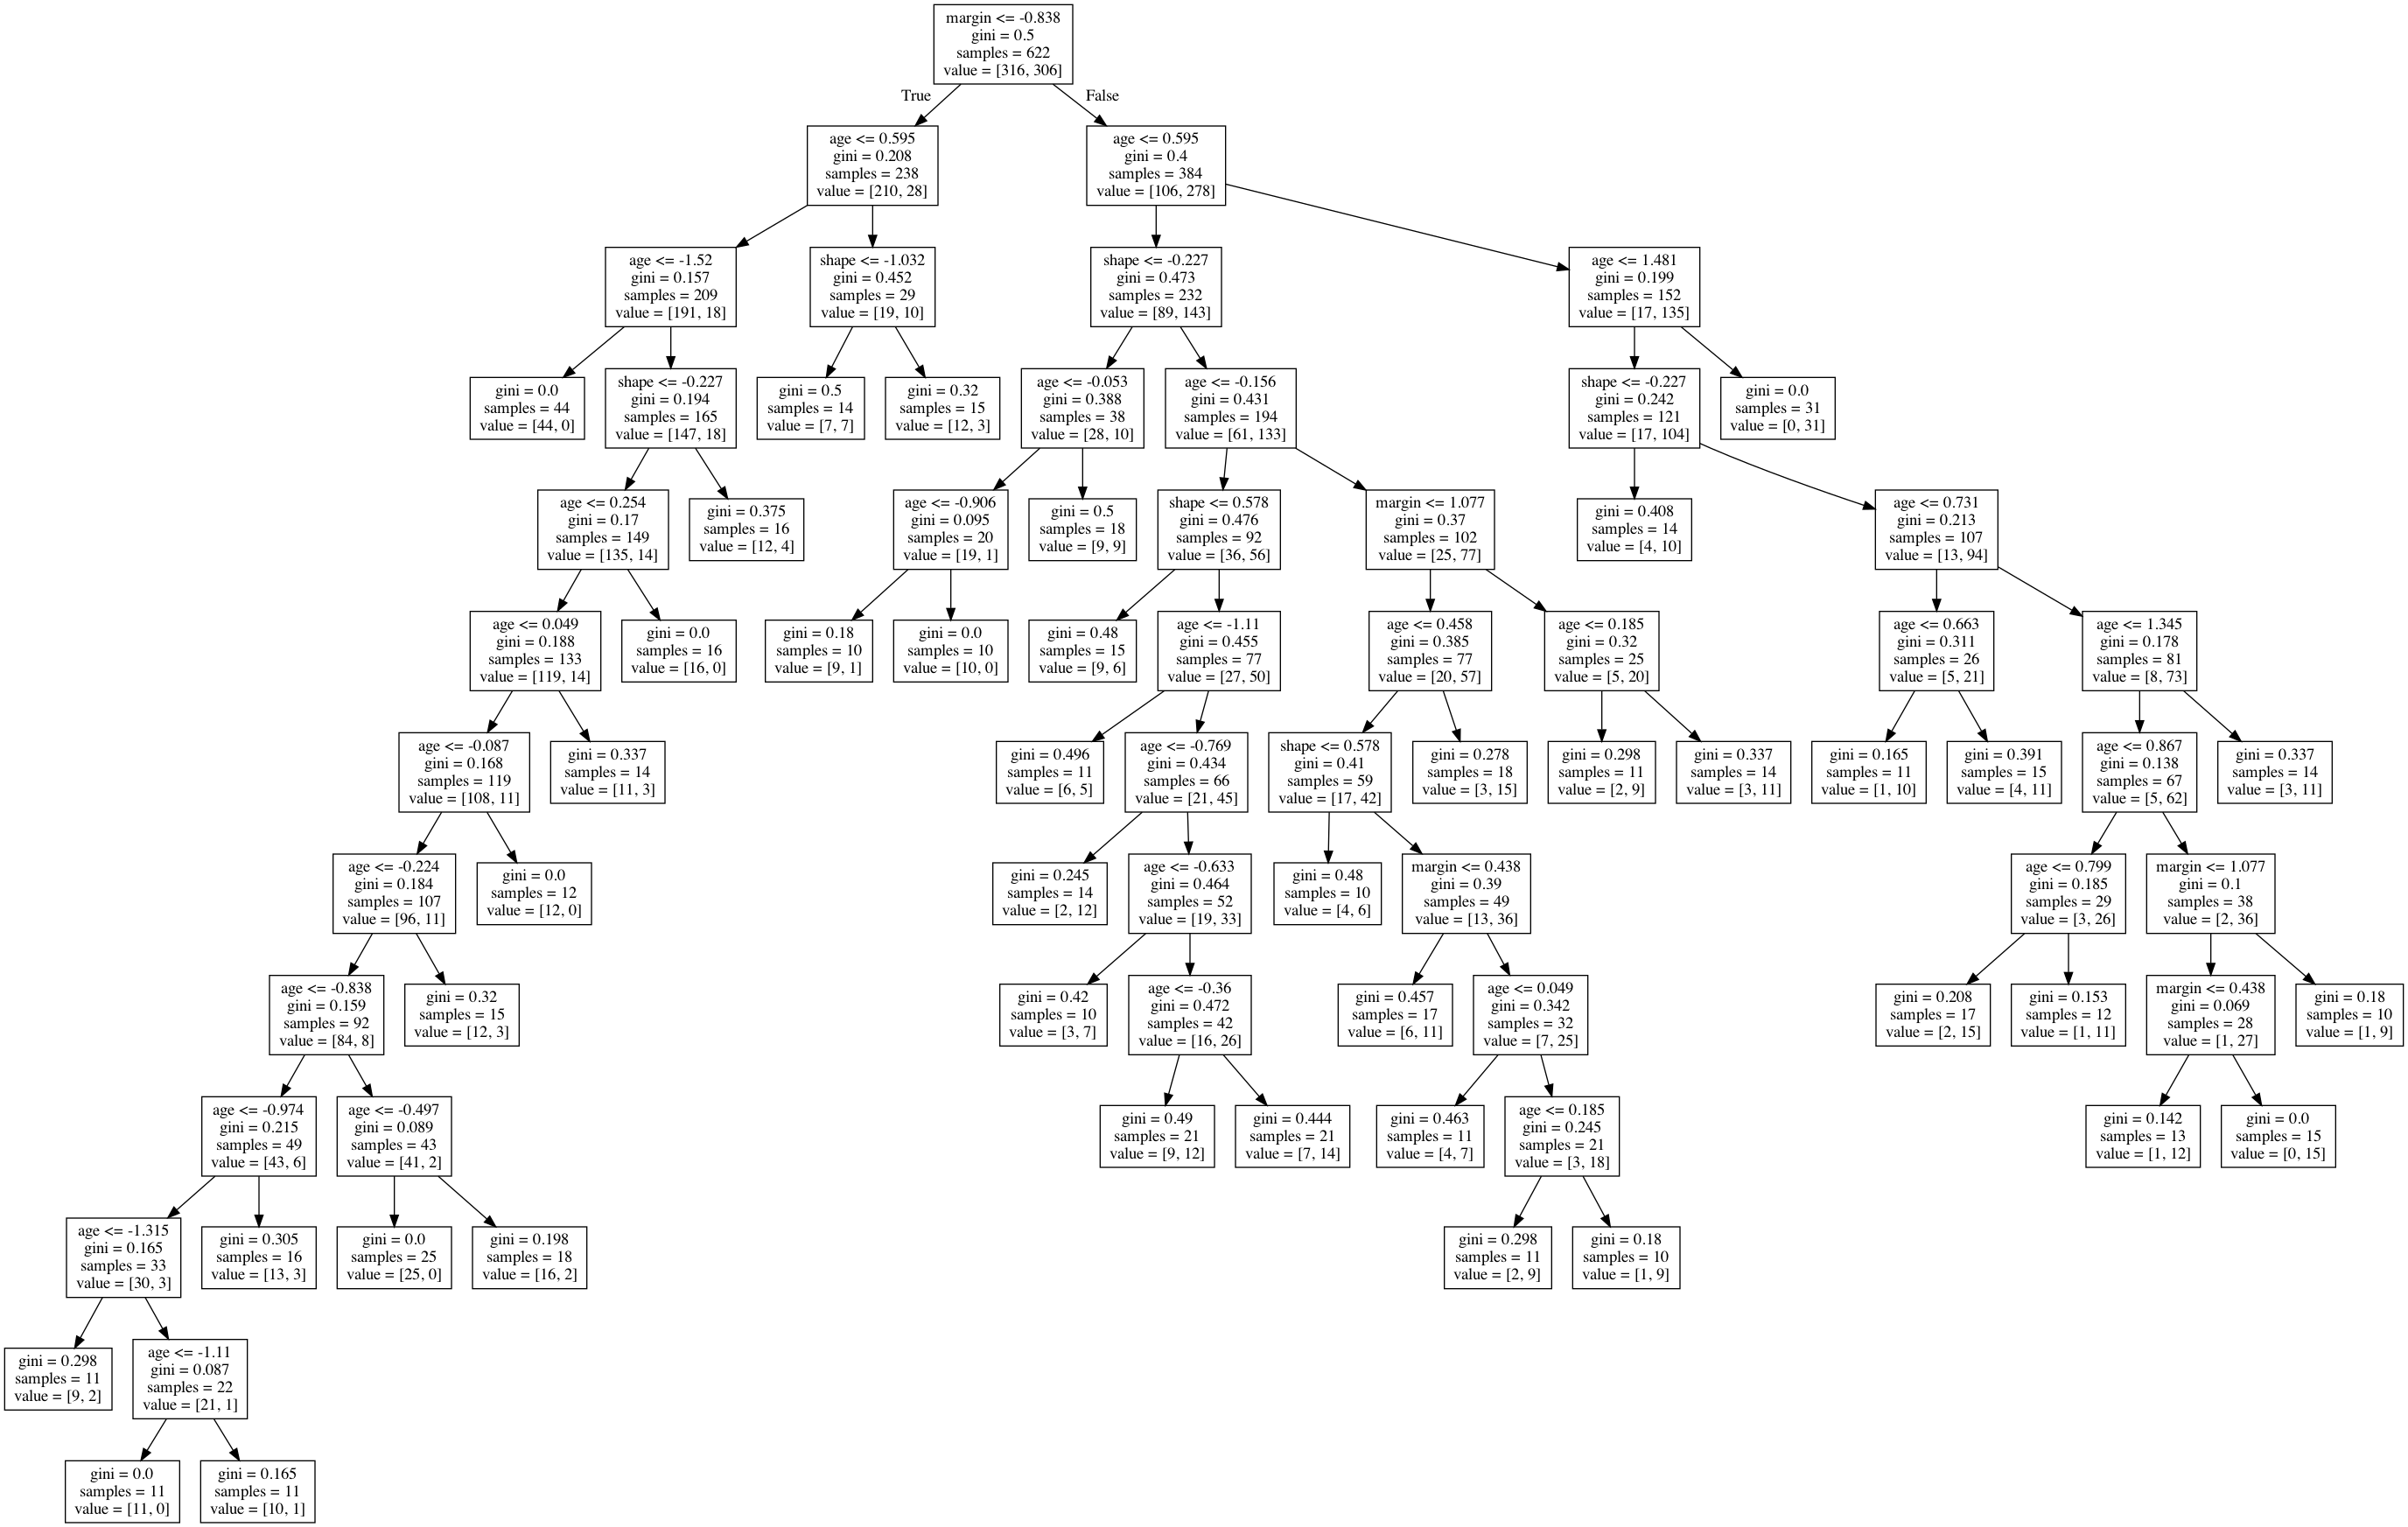

In [10]:
scores = cross_val_score(clf, X, y, cv=10)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)
r2 = r2_score(y_test, clf.predict(X_test))

print(r2)

r2_train = r2_score(y_train, clf.predict(X_train))

print(r2_train)
scores = cross_val_score(clf, X, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all folds:
print(scores.mean())


0.05340391938330058
0.6590758666335733
[0.73809524 0.69047619 0.83333333 0.71428571 0.85714286 0.73809524
 0.76190476 0.73809524 0.73809524 0.85714286 0.7804878  0.6097561
 0.7804878  0.80487805 0.7804878  0.7804878  0.82926829 0.80487805
 0.68292683 0.68292683]
0.7601626016260163


## SVM


In [12]:
from sklearn import svm, datasets
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
scores = cross_val_score(svc, X, y, cv=20)

print(scores)
print(scores.mean())

[0.76190476 0.69047619 0.80952381 0.76190476 0.83333333 0.88095238
 0.83333333 0.78571429 0.78571429 0.9047619  0.80487805 0.63414634
 0.82926829 0.80487805 0.85365854 0.75609756 0.92682927 0.85365854
 0.82926829 0.73170732]
0.8036004645760745


In [ ]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
scores = cross_val_score(svc, X, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all folds:
print(scores.mean())

In [16]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
scores = cross_val_score(svc, X, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.57142857 0.76190476 0.69047619 0.66666667 0.76190476 0.78571429
 0.71428571 0.73809524 0.69047619 0.73809524 0.7804878  0.63414634
 0.80487805 0.7804878  0.80487805 0.80487805 0.75609756 0.75609756
 0.82926829 0.65853659]
0.7364401858304298


In [17]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
scores = cross_val_score(svc, X, y, cv=20)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.76190476 0.71428571 0.80952381 0.76190476 0.83333333 0.88095238
 0.83333333 0.76190476 0.80952381 0.88095238 0.75609756 0.6097561
 0.7804878  0.73170732 0.82926829 0.75609756 0.85365854 0.87804878
 0.7804878  0.68292683]
0.7853077816492452


## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
last_score = 0
for x in range(1,50):
    nn = KNeighborsClassifier(n_neighbors=x)
    scores = cross_val_score(nn, X, y, cv=10)
    k_score = scores.mean()
    print(scores.mean())
    if k_score > last_score:
        last_score = k_score
        best_score = x
print(best_score)
print("Mean score was: ", last_score)


0.7325301204819278
0.6903614457831325
0.7542168674698796
0.7349397590361446
0.7710843373493976
0.7686746987951807
0.7951807228915662
0.7771084337349398
0.7903614457831326
0.7915662650602409
0.7891566265060241
0.783132530120482
0.7879518072289157
0.7867469879518072
0.7867469879518072
0.7831325301204819
0.7783132530120482
0.7783132530120482
0.7843373493975904
0.7855421686746988
0.7879518072289156
0.7855421686746988
0.7783132530120481
0.7783132530120482
0.7867469879518072
0.7855421686746988
0.7855421686746988
0.7867469879518072
0.7855421686746988
0.7903614457831325
0.7867469879518072
0.789156626506024
0.7879518072289156
0.7867469879518072
0.7831325301204819
0.7867469879518072
0.7843373493975904
0.7867469879518072
0.7819277108433734
0.7843373493975904
0.780722891566265
0.7819277108433734
0.780722891566265
0.7819277108433734
0.7831325301204819
0.7843373493975904
0.789156626506024
0.7903614457831325
0.7915662650602409
7
Mean score was:  0.7951807228915662


## Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
classifier = MultinomialNB()
scaler.fit(X)
scores = cross_val_score(classifier, scaler.transform(X), y, cv=10)
print(scores)
print (scores.mean())




[0.73493976 0.78313253 0.79518072 0.8313253  0.8313253  0.78313253
 0.74698795 0.75903614 0.89156627 0.69879518]
0.7855421686746988


## Logistic Regression

In [18]:
%matplotlib inline
from pylab import *
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print(scores.mean())
clf.summary()

[0.78571429 0.73809524 0.83333333 0.71428571 0.85714286 0.9047619
 0.85714286 0.78571429 0.78571429 0.88095238 0.7804878  0.63414634
 0.82926829 0.75609756 0.82926829 0.82926829 0.87804878 0.90243902
 0.82926829 0.75609756]
0.8083623693379792


## Model Evaluation

Overall, the best score received was from the logistic regression. I would select this as the model of choice as it both has the best performance, is not computationally intensive, and is simplest to understand. There may be more advanced techniques that may result in an overall better result such as neural networks, but the simplest choice is often the best one. 


## Potential Deployments and Conclusions

This type of model could be used as another layer of screening either before results are shown to a specialist or before surgery is conducted. The type of performance achieved is not enough to rely soley on these models. 

The next steps for this particular modeling problem might include gathering more data for training, investing in other features that may be predictive, or potentially seeing if better performance can be achieved by using a multi-model solution. 

In [ ]:
## Bibliography
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


